In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

In [223]:
S0 = 133.53   #Spot Stock Price
k = 130       #strike price
T = 4/52      #maturity
r = 0.0169    #risk free rate
q = 0    #continous dividend yield
sig =0.2619    #diffusion coefficient or volatlity
N = 3         #number of periods or number of time steps
payoff ='put' #payoff

In [224]:
#Delta

In [225]:
def delta(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    
    if payoff == 'call':
        delta =  (np.exp(-r*T))*si.norm.pdf(d2,0.0,1.0)/(sig*S0*np.sqrt(T))
    elif payoff == 'put':
        delta = -(np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0))/(sig*S0*np.sqrt(T))

    return delta



In [226]:
delta(133.53,130, 4/52, 0.0169, 0, 0.2619,'put')

-0.03863125888889909

In [227]:
import numpy as np

In [228]:

S0 = np.linspace(50,150,11)
T = np.linspace(0.5,2,51)
Delta = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Delta[i,j] = delta(S0[j],130,T[i],0.0169,0,0.2619,'put')

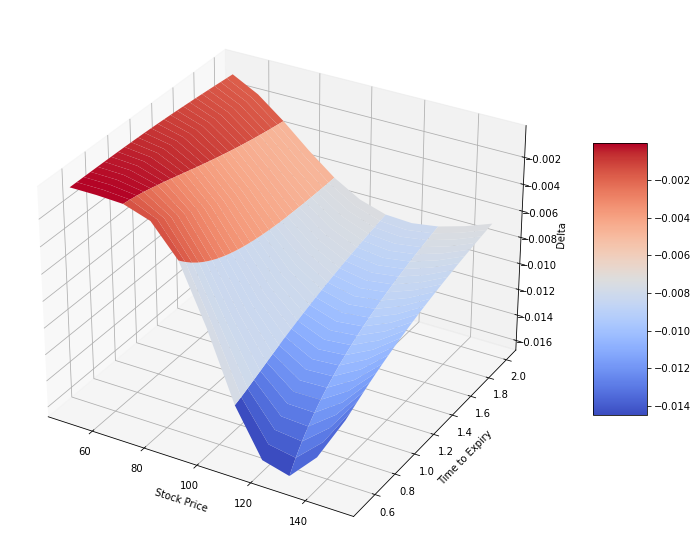

In [229]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [230]:
#Gamma


In [231]:
def gamma(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    
    if payoff =='call':
        gamma = -(np.exp(-r*T))*d1*si.norm.pdf(d2,0.0,1.0)/(sig**2 *S0**2 *T)
    elif payoff =='put':
        gamma = (np.exp(-r*T))*d1*si.norm.pdf(d2,0.0,1.0)/(sig**2 *S0**2 *T)
        
    return gamma
        
    


In [232]:
gamma(133.53,130, 4/52, 0.0169, 0, 0.2619,'put')

0.0016849730159083079

In [273]:
import numpy as np

In [274]:
S0 = np.linspace(50,150,11)
T = np.linspace(0.5,2,51)
Gamma = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S0[j],130,T[i],0.0169,0,0.2619,'put')

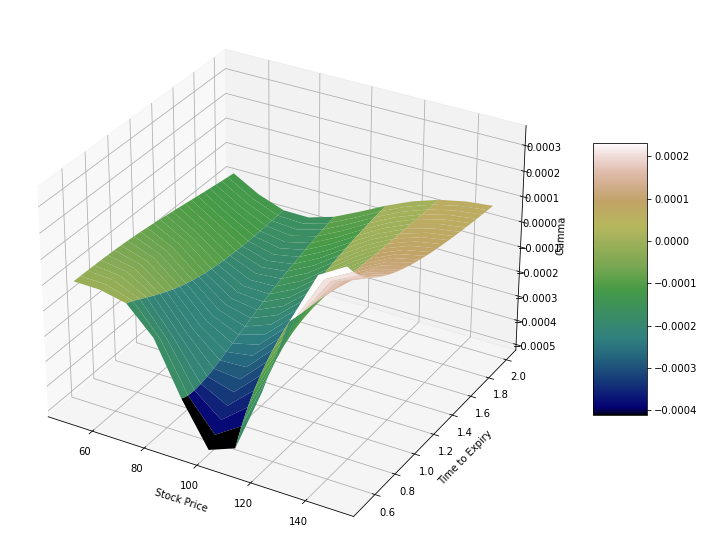

In [275]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.gist_earth, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [236]:
#Theta

In [237]:
def theta(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    a = d1/(2*T)
    b = (r-q)/(sig*np.sqrt(T))
    if payoff == 'call':
        theta = (r* np.exp(-r*T)*(si.norm.cdf(d2,0.0,1.0)))+((np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0))* (a-b))
    elif payoff == 'put':
        theta = (r* np.exp(-r*T)*(1- si.norm.cdf(d2,0.0,1.0)))-(np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0))* (a-b)

    return theta


In [238]:
theta(133.53,130,4/52,0.0169,0.0164,0.2619,'put')

-1.0216601445243034

In [270]:
import numpy as np

In [271]:
S0 = np.linspace(50,150,11)
T = np.linspace(0.5,2,51)
Theta = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Theta[i,j] = theta(S0[j],130,T[i],0.0169,0,0.2619,'put')

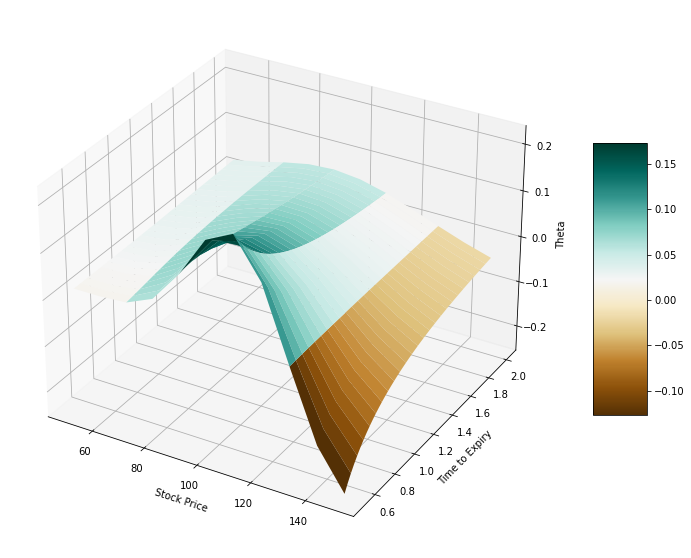

In [272]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Theta, rstride=2, cstride=2, cmap=plt.cm.BrBG, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [242]:
#Vega

In [243]:
def vega(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    a = np.sqrt(T)
    b = ((d2)/sig)   
    if payoff == 'call':
        vega = (-np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)) * (a+b)
    elif payoff == 'put':
        vega = (np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)) * (a+b)
            
    return vega
            

In [244]:
vega(133.53,130,4/52,0.0169,0,0.2619,'put')

0.6052611439788612

In [263]:
import numpy as np

In [264]:
S0 = np.linspace(50,150,11)
T = np.linspace(0.5,2,51)
Vega = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Vega[i,j] = vega(S0[j],130,T[i],0.0169,0,0.2619,'put')

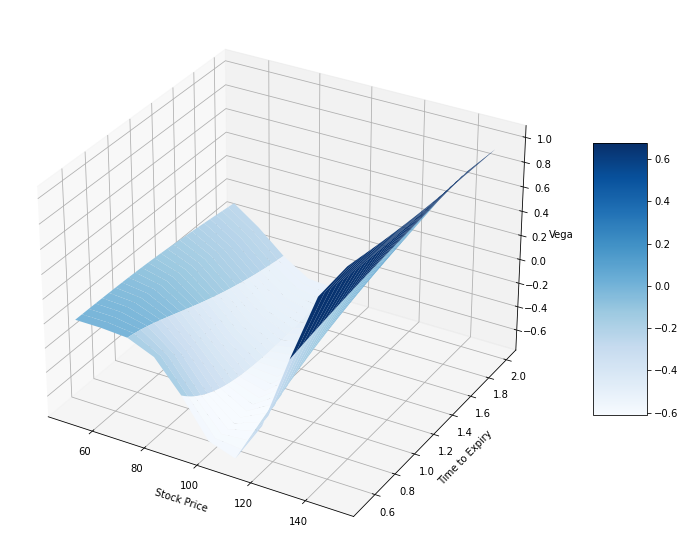

In [265]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Vega, rstride=2, cstride=2, cmap=plt.cm.Blues, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [248]:
#Rho(Sensitivity to interest rate)

In [249]:
def RHO(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    
    if payoff == 'call':
        RHO = (-(T)*np.exp(-r*T)* si.norm.cdf(d2)) + ((np.sqrt(T)/sig)*np.exp(-r*T)*si.norm.pdf(d2))
    elif payoff == 'put':
        RHO = (-(T)*np.exp(-r*T)* (1-si.norm.cdf(d2))) + ((np.sqrt(T)/sig)*np.exp(-r*T)*si.norm.pdf(d2))
        
    return RHO


In [250]:
RHO(133.53,130,4/52,0.0169,0,0.2619,'put')

0.36891466937666223

In [267]:
import numpy as np

In [268]:
S0 = np.linspace(50,150,11)
T = np.linspace(0.5,2,51)
Rho = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Rho[i,j] = RHO(S0[j],130,T[i],0.0169,0,0.2619,'put')

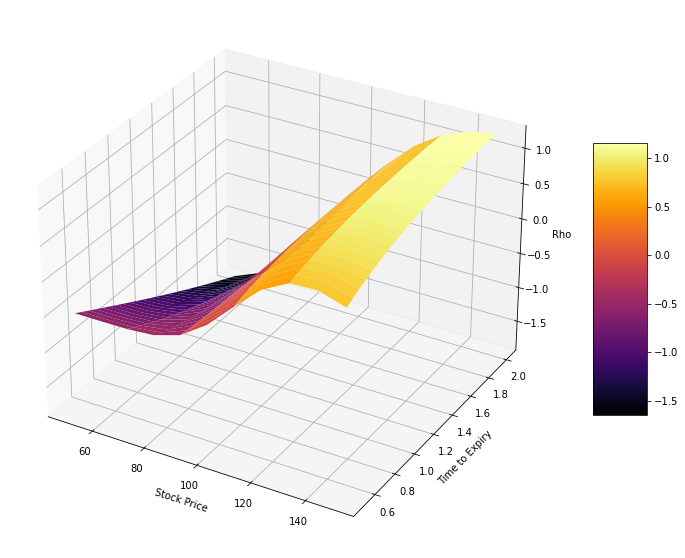

In [269]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Rho, rstride=2, cstride=2, cmap=plt.cm.inferno, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);